Notebook for exploring the relation between topological data analysis (TDA) features and behavioral data in the females from the training group. 

TDA data is constructed using the HCP_features.py file, which also used TDA code from Fernando. 

Behavioral data is constructed using the Make_cog_file_HCP Jupyer Notebook. 
Behavioral data is splitted into train and test group using Split_HCP_data_males Jupyter Notebook, or Split_HCP_data_females for females


# Import and order data

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from scipy import stats
from sklearn import linear_model
import statsmodels.api as sm
import numpy as np
from matplotlib.offsetbox import AnchoredText
import statsmodels.formula.api as smf

In [78]:
# Import functions for exploring data 
%run Functions.ipynb

In [77]:
# Import preprocessed data
df = pd.read_csv('/Users/minneschepers/Desktop/HCP/Data/Females_MI_exp.csv')

In [82]:
# Order data into behavioral data and tda features
separate = df.columns.get_loc('Subject') + 1
bd_columns = df.columns[:separate]
tda_features = df.columns[separate:]

# Drop the following: 
tda_features = tda_features.drop('Phase_transition_1') # leads to errors due to no variance

# Order tda features into lists
DMN_curvatures = [i for i in tda_features if 'DMN' in i if 'curv' in i]
FPN_curvatures = [i for i in tda_features if 'FPN' in i if 'curv' in i]
all_curvatures = [i for i in tda_features if 'all' in i if 'curv' in i]
p3_cliques = [i for i in tda_features if 'p3cliques' in i]
p4_cliques = [i for i in tda_features if 'p4cliques' in i]
global_features = [i for i in tda_features if i not in DMN_curvatures if i not in FPN_curvatures if i not in all_curvatures if i not in p3_cliques if i not in p4_cliques]

# Order Working Memory and Executive Functioning data into lists
WM = ['lswmt_unadjusted', 'lswmt_age']
EF = ['dccs_unadjusted', 'dccs_age',
       'flanker_unadjusted', 'flanker_age',
      'EF_unadjusted', 'EF_age']
WM_age = ['lswmt_age']
EF_age = ['dccs_age', 'flanker_age', 'EF_age']

# Heatmaps

In [81]:
# to_compare = global_features + WM + EF
# fig, ax = plt.subplots(figsize=(20,12))
# sns.heatmap(df_no_nan[to_compare].corr(), annot=True, cmap='viridis')
# plt.tight_layout()

# Get all significant features

Nr exlcuded: 1


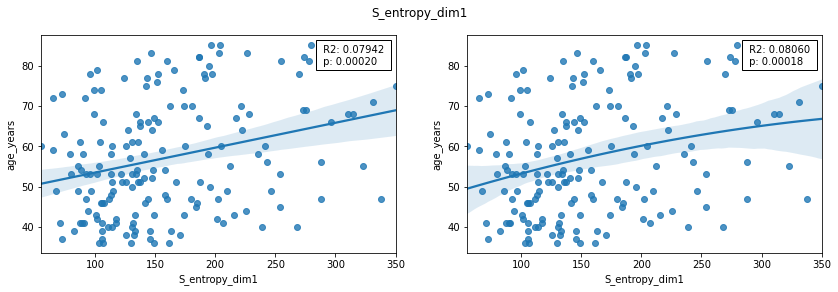

Nr exlcuded: 4


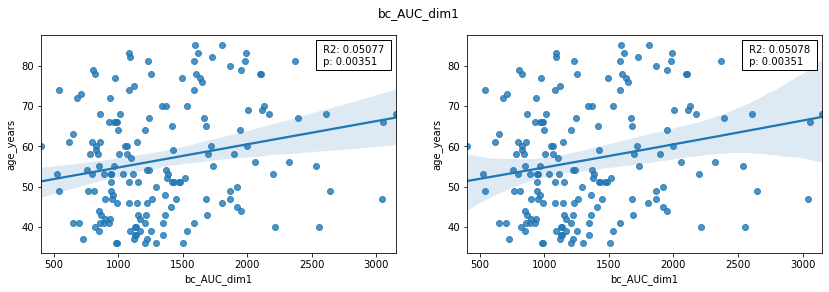

Nr exlcuded: 2


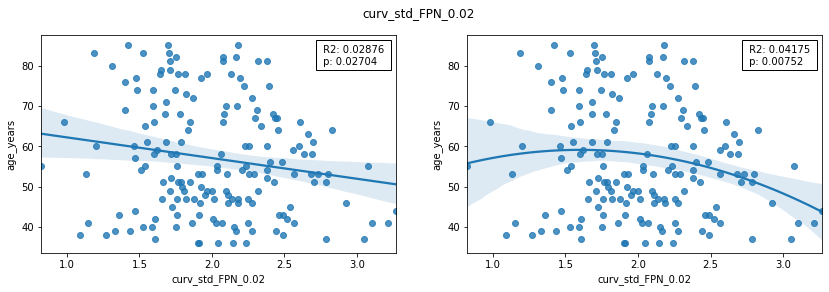

Nr exlcuded: 1


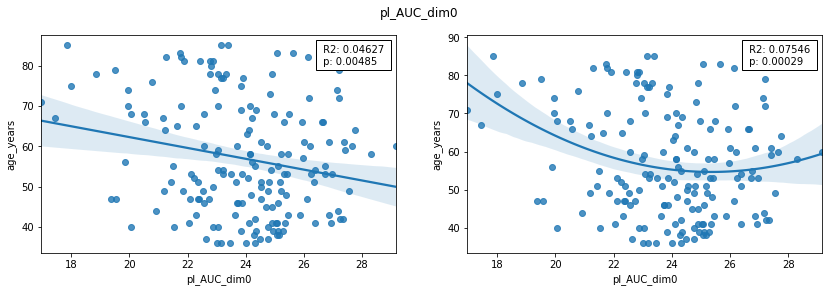

Nr exlcuded: 1


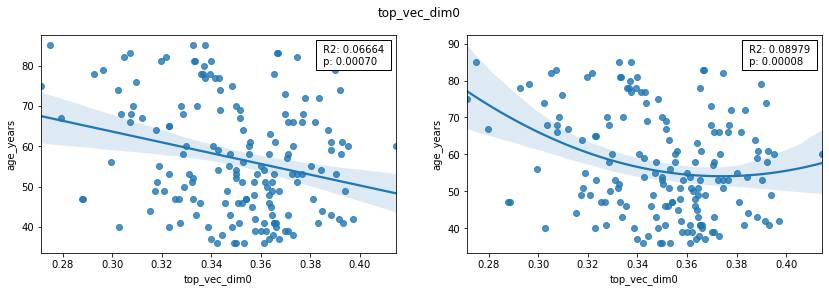

In [83]:
plots = [regplots(feature, 'age_years', df, 3, select='linear') for feature in tda_features]